In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
test = test.fillna(' ')
train = train.fillna(' ')

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [9]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
train['Concated Texts'] = train['title']+' '+train['author']+' '+train['text']
test['Concated Texts'] = test['title']+' '+test['author']+' '+test['text']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(train['Concated Texts'] , train.label , test_size=0.35)

count_vector = CountVectorizer(ngram_range=(1,2) , stop_words='english')


count_train = count_vector.fit_transform(x_train)
count_test = count_vector.transform(x_test)


In [13]:
model_01 = MultinomialNB(alpha=0.1)
model_01.fit(count_train ,y_train)
pred_model_01 = model_01.predict(count_test)
acc_model_01 = metrics.accuracy_score(y_test ,pred_model_01)

In [14]:
print(f"Multinomial Score On Count Vectorizer : {acc_model_01}")

Multinomial Score On Count Vectorizer : 0.9412087912087912


In [16]:
for i in np.arange (0 , 1 , 0.1):
    model01_tune = MultinomialNB(alpha=i)
    model01_tune.fit(count_train , y_train)
    pred_model01 = model01_tune.predict(count_test)
    acc_model01 = metrics.accuracy_score(y_test , pred_model01)
    print(f"Multinomial Tuned Scores on Count Vectorizer when alpha is {i} is : {acc_model01}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Multinomial Tuned Scores on Count Vectorizer when alpha is 0.0 is : 0.9087912087912088
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.1 is : 0.9412087912087912
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.2 is : 0.9406593406593406
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.30000000000000004 is : 0.9385989010989011
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.4 is : 0.9364010989010989
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.5 is : 0.9337912087912088
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.6000000000000001 is : 0.9320054945054945
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.7000000000000001 is : 0.9298076923076923
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.8 is : 0.925412087912088
Multinomial Tuned Scores on Count Vectorizer when alpha is 0.9 is : 0.9226648351648352


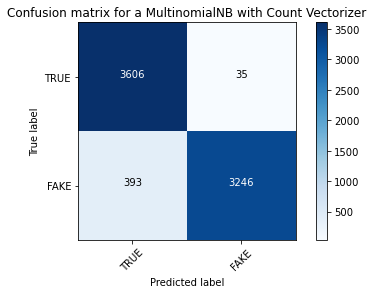

In [19]:
import itertools

cm = metrics.confusion_matrix(y_test , pred_model_01 , labels=[0,1])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

In [21]:
lr = LogisticRegression()
lr.fit(count_train , y_train)
pred_lr = lr.predict(count_test)
acc_lr = metrics.accuracy_score(y_test , pred_lr)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(f"Logistic Regression Score for Count Vectorizer : {acc_lr}")

Logistic Regression Score for Count Vectorizer : 0.9774725274725274


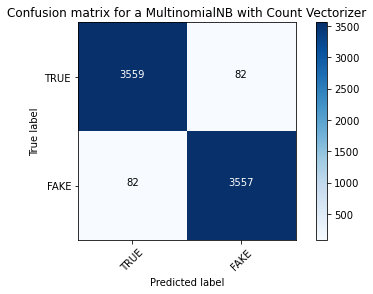

In [24]:
cm = metrics.confusion_matrix(y_test , pred_lr , labels=[0,1])
plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')